In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

In [2]:
product = pd.read_csv(r'C:\aaron\py4e\Lotte/01.Product.csv', encoding = 'utf-8')
search1 = pd.read_csv(r'C:\aaron\py4e\Lotte/02.Search1.csv', encoding = 'utf-8')
custom = pd.read_csv(r'C:\aaron\py4e\Lotte/04.Custom.csv',encoding='utf-8')
master = pd.read_csv(r'C:\aaron\py4e\Lotte/06.Master.csv',encoding='utf-8')
session = pd.read_csv(r'C:\aaron\py4e\Lotte/05.Session.csv', encoding = 'utf-8')



In [3]:
product2 = product.drop_duplicates('CLNT_ID', keep='first')

In [4]:
product2.PD_BRA_NM = product2.PD_BRA_NM.str.replace('[','').str.replace(']','').str.replace(',','').str.replace(' ','').str.replace('\(.*\)', '')

In [5]:
product2.PD_BUY_AM = product2.PD_BUY_AM.str.replace(',','').astype(int)

In [6]:
b = product2.PD_BUY_CT.str.replace(',','')
b = b.dropna()
product2.PD_BUY_CT[b.index] = b
product2.PD_BUY_CT = pd.to_numeric(product2.PD_BUY_CT)

In [7]:
product2['Total'] = product2['PD_BUY_AM'] * product2['PD_BUY_CT']

In [8]:
df =pd.merge(custom, product2, on='CLNT_ID')

In [9]:
df_need = df[['CLNT_ID','SESS_ID','CLNT_GENDER','CLNT_AGE','PD_C','PD_BRA_NM','Total','PD_BUY_CT']]

In [10]:
df_need.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671679 entries, 0 to 671678
Data columns (total 8 columns):
CLNT_ID        671679 non-null int64
SESS_ID        671679 non-null int64
CLNT_GENDER    671679 non-null object
CLNT_AGE       671679 non-null int64
PD_C           671679 non-null int64
PD_BRA_NM      671679 non-null object
Total          671679 non-null int64
PD_BUY_CT      671679 non-null int64
dtypes: int64(6), object(2)
memory usage: 46.1+ MB


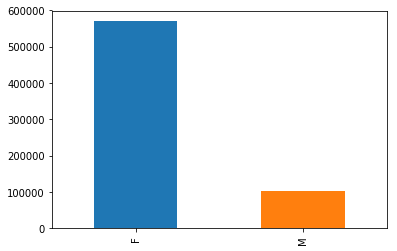

In [11]:
df_need['CLNT_GENDER'].value_counts().plot(kind='bar')

In [12]:
df_need.groupby(['CLNT_GENDER'])['Total'].sum()

CLNT_GENDER
F    30763300320
M     6833190711
Name: Total, dtype: int64

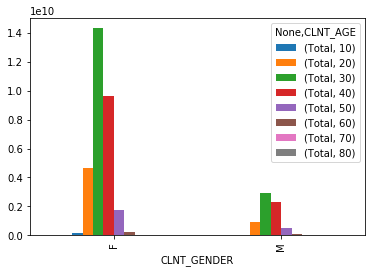

In [13]:
dff = pd.pivot_table(df_need, index=['CLNT_GENDER','CLNT_AGE'], values =['Total'], aggfunc='sum')
dff.unstack('CLNT_AGE').plot(kind='bar')

In [14]:
master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


In [15]:
product_cat = pd.merge(df_need,master, on='PD_C')

In [16]:
product_cat.head()

,CLNT_ID,SESS_ID,CLNT_GENDER,CLNT_AGE,PD_C,PD_BRA_NM,Total,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4830726,2546785,F,30,357970,에스까다,130000,1,SES937G 531X SES937,패션잡화,안경/선글라스,안경테
1,4830874,1456881,F,40,81976,유닛,69000,1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버
2,2635425,943587,F,50,81976,유닛,69000,1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버
3,4593160,1700732,F,40,81976,유닛,69000,1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버
4,36126,366547,F,30,81976,유닛,69000,1,[UFC4-KT42N]캐시미어100프로 기본 터틀넥 니트 스웨터 - L/블루(15)...,여성의류,여성의류상의,여성스웨터/풀오버


In [17]:
all = pd.merge(product_cat, session, on=['CLNT_ID','SESS_ID'])
del all['ZON_NM']
del all['CITY_NM']
del all['CLAC2_NM']
del all['CLAC3_NM']

In [18]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671679 entries, 0 to 671678
Data columns (total 15 columns):
CLNT_ID            671679 non-null int64
SESS_ID            671679 non-null int64
CLNT_GENDER        671679 non-null object
CLNT_AGE           671679 non-null int64
PD_C               671679 non-null int64
PD_BRA_NM          671679 non-null object
Total              671679 non-null int64
PD_BUY_CT          671679 non-null int64
PD_NM              671679 non-null object
CLAC1_NM           671679 non-null object
SESS_SEQ           671679 non-null int64
SESS_DT            671679 non-null int64
TOT_PAG_VIEW_CT    671603 non-null float64
TOT_SESS_HR_V      667702 non-null object
DVC_CTG_NM         671679 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 82.0+ MB


# 여성의류/남성의류

In [19]:
man = all[all['CLAC1_NM'] =='남성의류']
woman2 = all[all['CLAC1_NM'] =='여성의류']

In [20]:
# 남녀공용 삭제
unisex = all[all['PD_NM'].str.contains('남녀공용|남여공용|남.녀|남.녀공용|남.여공용|남녀|남여')]
all.drop(index =unisex.index, inplace = True)

# 남성의류 카테고리에서 여성 의류 추출 후 여성의류와 병합.
ww = man[man['PD_NM'].str.contains('여|여성|녀')]
man.drop(index =ww.index, inplace = True)
woman = pd.concat([woman2, ww])

In [21]:
woman_brand = woman.groupby('PD_BRA_NM')[['PD_BUY_CT','Total']].sum().sort_values(by = 'PD_BUY_CT',ascending=False).reset_index()
woman_brand.index= woman_brand.index+1
woman_brand.head(15)

,PD_BRA_NM,PD_BUY_CT,Total
1,지오다노,4961,79658820
2,에이치커넥트,2862,30713360
3,제이제이지고트,2582,140328800
4,랩,2224,106375400
5,탑텐,1983,25390220
6,게스,1807,76809290
7,쉬즈미스,1748,85496390
8,에고이스트,1456,120525110
9,플라스틱아일랜드스토리,1386,73615200
10,타미진,1272,92430340


In [22]:
man_brand = man.groupby('PD_BRA_NM')[['PD_BUY_CT','Total']].sum().sort_values(by = 'PD_BUY_CT',ascending=False).reset_index()
man_brand.index= man_brand.index+1
man_brand.head(15)

,PD_BRA_NM,PD_BUY_CT,Total
1,지오다노,6563,106684790
2,헤지스남성,3930,231204450
3,탑텐,2505,27847450
4,빈폴,1441,123156080
5,타미힐피거,1319,92339980
6,지오지아,1089,20724530
7,폴햄,1083,20117580
8,라코스테,1071,113984300
9,올젠,897,43457770
10,게스,810,30052360


In [23]:
_20s = all[all['CLNT_AGE'] == 20][all['CLNT_GENDER']=='F']
_30s = all[all['CLNT_AGE'] == 30][all['CLNT_GENDER']=='F']
_40s = all[all['CLNT_AGE'] == 40][all['CLNT_GENDER']=='F']
_50s = all[all['CLNT_AGE'] == 50][all['CLNT_GENDER']=='F']

In [24]:
_20s_ = _20s[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_20s_.index = _20s_.index + 1
del _20s_['index']

_30s_ = _30s[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_30s_.index = _30s_.index + 1
del _30s_['index']

_40s_ = _40s[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_40s_.index = _40s_.index + 1
del _40s_['index']

_50s_ = _50s[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_50s_.index = _50s_.index + 1
del _50s_['index']

In [25]:
_20s_.head(15)

,PD_BRA_NM,Total,PD_BUY_CT
1,나이키,137193050,2386
2,입생로랑,116610000,2453
3,나스,108670000,2325
4,조르지오아르마니,101915000,1951
5,프라다,84035950,137
6,정관장,67870800,623
7,LG전자,57546740,97
8,아디다스,50931870,1104
9,삼성전자,43521620,93
10,지방시,42922500,30


In [26]:
_40s_.head(15)

,PD_BRA_NM,Total,PD_BUY_CT
1,LG전자,292694310,341
2,나이키,210074630,3439
3,정관장,204554680,1818
4,아디다스,187995870,4158
5,삼성전자,136720580,308
6,프라다,102842800,112
7,입생로랑,83712400,1758
8,다이슨,77485300,104
9,헤지스남성,65213000,1162
10,빈폴레이디스,63603920,446


In [27]:
_20sm = all[all['CLNT_AGE'] == 20][all['CLNT_GENDER']=='M']
_30sm = all[all['CLNT_AGE'] == 30][all['CLNT_GENDER']=='M']
_40sm = all[all['CLNT_AGE'] == 40][all['CLNT_GENDER']=='M']
_50sm = all[all['CLNT_AGE'] == 50][all['CLNT_GENDER']=='M']

In [28]:
_20sm_ = _20sm[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_20sm_.index = _20sm_.index + 1
del _20sm_['index']

_30sm_ = _30sm[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_30sm_.index = _30sm_.index + 1
del _30sm_['index']

_40sm_ = _40sm[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_40sm_.index = _40sm_.index + 1
del _40sm_['index']

_50sm_ = _50sm[['PD_BRA_NM','Total','PD_BUY_CT']].groupby('PD_BRA_NM').sum().reset_index().sort_values('Total', ascending=False).reset_index()
_50sm_.index = _50sm_.index + 1
del _50sm_['index']


In [29]:
_20sm_.head(15)

,PD_BRA_NM,Total,PD_BUY_CT
1,나이키,72276870,1153
2,프라다,27524900,39
3,LG전자,21096210,24
4,아디다스,20936620,405
5,라코스테,18748000,182
6,프레드릭콘스탄트,17779000,1
7,지오다노,17491840,942
8,삼성전자,17236590,43
9,노스페이스,12414400,114
10,애플,11565600,34


In [30]:
_40sm_.head(15)

,PD_BRA_NM,Total,PD_BUY_CT
1,LG전자,109469350,137
2,나이키,80149590,1168
3,삼성전자,70615210,163
4,정관장,52509200,444
5,아디다스,43635040,926
6,다이슨,27573700,33
7,헤지스남성,24870060,422
8,애플,21859100,35
9,프라다,19831000,19
10,노스페이스,19156150,329


In [31]:
df[df['CLNT_ID']==929827]

,CLNT_ID,CLNT_GENDER,CLNT_AGE,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,Total
92097,929827,M,20,609951,57,51344,1개,프레드릭콘스탄트,17779000,1,17779000
